In [7]:
import pandas as pd

#read csv
df = pd.read_csv('q1_data.csv')

In [8]:
print df.head()

      F1     F2  target
0  0.894  0.448     0.0
1 -0.764  0.238     1.0
2 -0.285 -0.747     1.0
3 -0.844 -0.536     0.0
4  0.462 -0.653     1.0


In [9]:
print df.describe()

                 F1            F2      target
count  1.000000e+03  1.000000e+03  1000.00000
mean   1.354472e-17 -1.143530e-17     0.50000
std    6.406501e-01  6.406501e-01     0.50025
min   -1.000000e+00 -1.000000e+00     0.00000
25%   -6.242500e-01 -6.242500e-01     0.00000
50%   -4.900000e-17  4.900000e-17     0.50000
75%    6.242500e-01  6.242500e-01     1.00000
max    1.000000e+00  1.000000e+00     1.00000


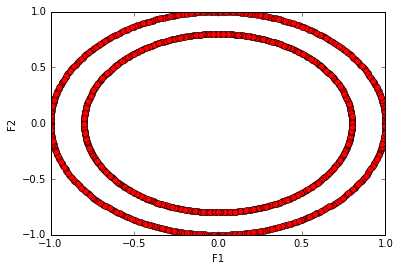

In [11]:
### a)Find out what this relationship looks like by plotting a 2-D graph of the two features. You can use
###   Python’s matplotlib for this task or any other plotting tool of your choice. Include the plot in your
###   answer. (5 pts)
%matplotlib inline
import matplotlib.pyplot as plt
plt.plot(df['F1'], df['F2'], 'ro')
plt.xlabel('F1')
plt.ylabel('F2')
plt.show()


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009687208>]], dtype=object)

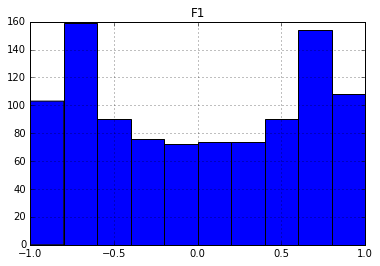

In [13]:
df.hist('F1')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000000009691550>]], dtype=object)

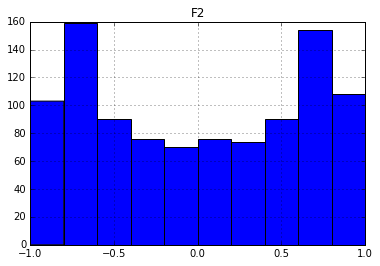

In [14]:
df.hist('F2')

In [15]:
#from above two graphs we can see that they have almost same kind of frequency
#also two features are highly co-related.

In [16]:
### b) Using scikit-learn, fit a logistic regression model to the dataset and evaluate its performance
### (accuracy) with 10-fold cross-validation. You should report performance using the accuracy measure,
### averaged across all cross-validation runs. Include your source code.
from sklearn.linear_model import LogisticRegression
from sklearn import cross_validation

In [20]:
#split it as train and test
features = ['F1', 'F2']
target = ['target']
x_train, x_test, y_train, y_test = cross_validation.train_test_split(df[features], df[target], test_size=0.3, random_state=0)
logit_clf = LogisticRegression()

In [40]:
print (type(x_train), type(y_train))
print (x_train.shape, y_train.shape)
logit_clf.fit(x_train, y_train)
print (logit_clf.score(x_test, y_test))

(<class 'pandas.core.frame.DataFrame'>, <class 'pandas.core.frame.DataFrame'>)
((700, 2), (700, 1))
0.536666666667


C:\Users\ravindra\Anaconda2\lib\site-packages\sklearn\utils\validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [45]:
print (df[features].shape, df[target].shape)
new_logit = LogisticRegression()
scores = cross_validation.cross_val_score(new_logit, df[features], df['target'], cv=10)
print scores
print ("#############################################################################################")
print ("scores accuracy is = ", scores.mean(), "with two standard deviation is =", scores.std() * 2)
print ('#############################################################################################')

((1000, 2), (1000, 1))
[ 0.43  0.45  0.47  0.43  0.37  0.47  0.46  0.43  0.44  0.45]
#############################################################################################
('scores accuracy is = ', 0.43999999999999995, 'with two standard deviation is =', 0.055136195008360887)
#############################################################################################


In [46]:
def validate_features(df, features):
    logit = LogisticRegression()
    scores = cross_validation.cross_val_score(new_logit, df[features], df['target'], cv=10)
    return (scores.mean(), scores.std() * 2)

In [47]:
####################################################################################################
#c)Can you think of a way to improve the performance of the model while still employing the logistic
#regression algorithm? If so, describe how, include your code and present performance results. (Hint:
#think about creating new features based on F1 and F2). (15 pts)
####################################################################################################
# we will add features to original dataframe F1 + F2, F1 - F2, F1**2 + F2**2, F1**2 - F2**2
df['F1 + F2'] = df['F1'] + df['F2']
df['F1 - F2'] = df['F1'] - df['F2']
df['F1+F2sq'] = df['F1'] ** 2 + df['F2'] ** 2
df['F1-F2sq'] = df['F1'] ** 2 - df['F2'] ** 2
print df.head()

      F1     F2  target  F1 + F2  F1 - F2   F1+F2sq   F1-F2sq
0  0.894  0.448     0.0    1.342    0.446  0.999940  0.598532
1 -0.764  0.238     1.0   -0.526   -1.002  0.640340  0.527052
2 -0.285 -0.747     1.0   -1.032    0.462  0.639234 -0.476784
3 -0.844 -0.536     0.0   -1.380   -0.308  0.999632  0.425040
4  0.462 -0.653     1.0   -0.191    1.115  0.639853 -0.212965


In [49]:
# now we will try out various combination of features to try increase our accuracy
combinations = [['F1', 'F2', 'F1 + F2'], ['F1', 'F2', 'F1 - F2'], ['F1', 'F2', 'F1 + F2', 'F1 - F2'],
                ['F1', 'F2', 'F1+F2sq'], ['F1', 'F2', 'F1-F2sq'], ['F1', 'F2', 'F1+F2sq', 'F1-F2sq']]
for combination in combinations:
    print combination, validate_features(df, combination)

['F1', 'F2', 'F1 + F2'] (0.43899999999999995, 0.053254107822777397)
['F1', 'F2', 'F1 - F2'] (0.441, 0.056178287620752554)
['F1', 'F2', 'F1 + F2', 'F1 - F2'] (0.43999999999999995, 0.055136195008360887)
['F1', 'F2', 'F1+F2sq'] (1.0, 0.0)
['F1', 'F2', 'F1-F2sq'] (0.42400000000000004, 0.064621977685614049)
['F1', 'F2', 'F1+F2sq', 'F1-F2sq'] (1.0, 0.0)


In [50]:
print('#####################################################################################')
print('from above result choosing new feature F1**2+F2**2 is giving 1.0 accuracy and 0.0 std')
print('#####################################################################################')

#####################################################################################
from above result choosing new feature F1**2+F2**2 is giving 1.0 accuracy and 0.0 std
#####################################################################################


In [52]:
##d) Fit a Random Forest model to the dataset and based on what you find out, discuss why you think it
##performs better or worse than logistic regression. Include your source code. (10 pts)
# Import the random forest package
from sklearn.ensemble import RandomForestClassifier
# Create the random forest object which will include all the parameters
# for the fit The number of trees in the forest. = 100
forest = RandomForestClassifier(n_estimators = 100)
# Fit the training data to create the decision trees
forest = forest.fit(x_train, y_train)
# Take the same decision trees and run it on the test data
score = forest.score(x_test, y_test)
print score

C:\Users\ravindra\Anaconda2\lib\site-packages\ipykernel\__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


1.0


In [54]:
## clearly data was not LINEARLY SEPARABLE, hence logistic regression performed poorly.
## with new feature engineering F1**2 + F2**2 in Logistic regression we got accuracy of 1.0
## random forest has many decision tree(here 100) which
## decides based on information gain from each decision tree and voting betweem them gives more accurate result
## and it can classify non linear data as well.